<a href="https://colab.research.google.com/github/zhestyatsky/mipt-opt-project/blob/dev/src/spider_boost_experiments_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/zhestyatsky/mipt-opt-project.git
import sys
sys.path.append('/content/mipt-opt-project/src')

Cloning into 'mipt-opt-project'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 172 (delta 4), reused 11 (delta 3), pack-reused 157
Receiving objects: 100% (172/172), 3.22 MiB | 2.19 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [0]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import utils
from spider_boost import spider_boost

In [3]:
train_dataset = dsets.MNIST(root='~/.pytorch/MNIST_data/', train=True, transform=transforms.ToTensor(), download=True)
train_dataset = utils.DatasetWrapper(train_dataset)

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
class CustomModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CustomModel, self).__init__()
        self.conv1 = torch.nn.Linear(input_dim, 28)
        self.conv2 = torch.nn.Linear(28, output_dim)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        outputs = torch.sigmoid(self.conv2(x))
        return outputs
    
gd_model = CustomModel(784, 10)
sb_model = copy.deepcopy(gd_model)

if torch.cuda.is_available():
    gd_model = gd_model.cuda()
    sb_model = sb_model.cuda()

In [0]:
loss = torch.nn.CrossEntropyLoss().cuda()
regularizer = utils.regularizer

In [0]:
batch_size = 2048
learning_rate = 0.001
n_epochs = 100

In [7]:
gd_total_loss = utils.gradient_descent(train_dataset, batch_size, gd_model, loss, regularizer, learning_rate, n_epochs)
sb_total_loss = spider_boost(train_dataset, batch_size, sb_model, loss, regularizer, learning_rate, n_epochs)

epoch: 0
epoch: 20
epoch: 40
epoch: 60
epoch: 80
epoch: 0
epoch: 20
epoch: 40
epoch: 60
epoch: 80


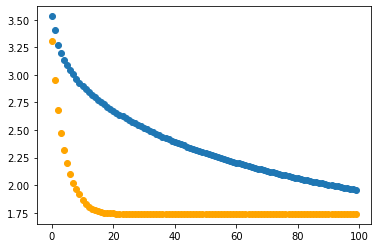

In [8]:
plt.scatter(np.arange(n_epochs), gd_total_loss)
plt.scatter(np.arange(n_epochs), sb_total_loss, color='orange')
plt.show()